# 02 - Exploratory Data Analysis and Visualization

This notebook includes:
- Descriptive statistics
- Correlation analysis
- Group comparisons
- Hypothesis testing
- Data visualization (histograms, boxplots, scatter plots, heatmaps)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


# Helper function for consistent pass/fail threshold visualization
def add_threshold_line(
    threshold=10,
    orientation="horizontal",
    line_color="red",
    line_style="--",
    line_width=2,
    line_alpha=0.7,
    annotation_text="Pass/Fail\nThreshold",
    show_annotation=True,
    x_pos=None,
    y_pos=None,
    text_offset_x=0,
    text_offset_y=-3,
    text_color="black",
    text_size=10,
    text_weight="bold",
):
    """
    Adds a threshold line (horizontal or vertical) with optional annotation to the current plot.

    Parameters:
    - threshold: Threshold value (default: 10)
    - orientation: 'horizontal' or 'vertical' line orientation
    - line_color: Color of the threshold line (default: "red")
    - line_style: Line style (default: "--")
    - line_width: Line width (default: 2)
    - line_alpha: Line transparency (default: 0.7)
    - annotation_text: Text for annotation (default: "Pass/Fail\nThreshold")
    - show_annotation: Whether to show annotation (default: True)
    - x_pos: X position for annotation (if None, auto-calculated)
    - y_pos: Y position for annotation (if None, auto-calculated)
    - text_offset_x: X offset for annotation text
    - text_offset_y: Y offset for annotation text
    - text_color: Color of annotation text (default: "black")
    - text_size: Font size of annotation (default: 10)
    - text_weight: Font weight of annotation (default: "bold")
    """

    # Add threshold line
    if orientation.lower() == "horizontal":
        plt.axhline(
            y=threshold,
            color=line_color,
            linestyle=line_style,
            linewidth=line_width,
            alpha=line_alpha,
        )

        # Auto-calculate annotation position for horizontal line
        if show_annotation:
            if x_pos is None:
                xlims = plt.xlim()
                x_pos = (xlims[0] + xlims[1]) / 2
            if y_pos is None:
                y_pos = threshold

    elif orientation.lower() == "vertical":
        plt.axvline(
            x=threshold,
            color=line_color,
            linestyle=line_style,
            linewidth=line_width,
            alpha=line_alpha,
        )

        # Auto-calculate annotation position for vertical line
        if show_annotation:
            if x_pos is None:
                x_pos = threshold
            if y_pos is None:
                ylims = plt.ylim()
                y_pos = (ylims[0] + ylims[1]) / 2
    else:
        raise ValueError("orientation must be 'horizontal' or 'vertical'")

    # Add annotation if requested
    if show_annotation:
        plt.annotate(
            annotation_text,
            xy=(x_pos, y_pos),
            xytext=(x_pos + text_offset_x, y_pos + text_offset_y),
            color=text_color,
            fontsize=text_size,
            fontweight=text_weight,
            arrowprops=dict(arrowstyle="->", color=text_color, lw=1.5),
        )


# Convenience functions for common use cases
def add_pass_fail_line(threshold=10, **kwargs):
    """Add horizontal pass/fail threshold line"""
    return add_threshold_line(threshold=threshold, orientation="horizontal", **kwargs)


def add_vertical_threshold(threshold=10, **kwargs):
    """Add vertical threshold line"""
    return add_threshold_line(threshold=threshold, orientation="vertical", **kwargs)

In [2]:
# 🎨 CONSISTENT STYLE CONFIGURATION
# Set up professional, consistent styling for all plots

# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Set matplotlib parameters for consistency
plt.rcParams.update(
    {
        "figure.figsize": (10, 6),  # Default figure size
        "font.size": 11,  # Base font size
        "axes.titlesize": 14,  # Title font size
        "axes.labelsize": 12,  # Axis label font size
        "xtick.labelsize": 10,  # X-tick label size
        "ytick.labelsize": 10,  # Y-tick label size
        "legend.fontsize": 10,  # Legend font size
        "axes.grid": True,  # Enable grid
        "grid.alpha": 0.3,  # Grid transparency
        "lines.linewidth": 2,  # Line width
        "axes.spines.top": False,  # Remove top spine
        "axes.spines.right": False,  # Remove right spine
    }
)

# Color constants for consistent theming
COLORS = {
    "primary": "#3691d2",  # Blue
    "secondary": "#ff7f0e",  # Orange
    "success": "#2ca02c",  # Green
    "danger": "#d62728",  # Red
    "warning": "#ff7f0e",  # Orange
    "threshold": "#d62728",  # Red for pass/fail lines
    "data_leakage": "#ff7f0e",  # Orange for G1/G2 warnings
}

print("✅ Professional styling configured!")

✅ Professional styling configured!


In [3]:
# df = pd.read_csv(r"../data/processed/student_data_prepared.csv")
df = pd.read_pickle(r"../data/processed/cleaned_dataset.pkl")

# Create a single numeric version of the dataframe for all correlation analyses

df_numeric = df.copy()
for col in df_numeric.columns:
    if df_numeric[col].dtype == "category":
        df_numeric[col] = df_numeric[col].cat.codes
    elif df_numeric[col].dtype == "bool":
        df_numeric[col] = df_numeric[col].astype(int)

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


## 📊 Descriptive Statistics

In [5]:
# Descriptive statistics for numeric variables
df.describe()

,age,failures,absences,G1,G2,G3,pass_fail
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,0.221880,3.659476,11.399076,11.570108,11.906009,0.845917
std,1.218138,0.593235,4.640759,2.745265,2.913639,3.230656,0.361307
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,10.000000,10.000000,10.000000,1.000000
50%,17.000000,0.000000,2.000000,11.000000,11.000000,12.000000,1.000000
75%,18.000000,0.000000,6.000000,13.000000,13.000000,14.000000,1.000000
max,22.000000,3.000000,32.000000,19.000000,19.000000,19.000000,1.000000


In [ ]:
 df.describe(include="category")

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,5,5,4,3,4,4,5,5,5,5,5,5
top,GP,F,U,GT3,T,2,2,other,other,course,mother,1,2,4,3,3,1,1,5
freq,423,383,452,457,569,186,209,258,367,285,455,366,305,317,251,205,451,247,249


In [7]:
df.describe(include="bool")

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,2,2,2
top,False,True,False,False,True,True,True,False
freq,581,398,610,334,521,580,498,410


---

## 🎯 Target Variable Analysis (Final Grades)

### What it shows:

- **Central tendency**: G3 scores cluster around 10-13, indicating most students achieve average performance in the Portuguese grading system.
- **Pass/Fail threshold**: The red dashed line at 10 clearly separates passing students (majority) from failing students (smaller left tail).
- **Distribution shape**: Mild left skew shows more students achieve average-to-good grades, with fewer exceptional performers at the high end (17-19).
- **At-risk identification**: Low-end outliers (0-5 range) represent students who may have dropped out or faced severe academic challenges during the year.

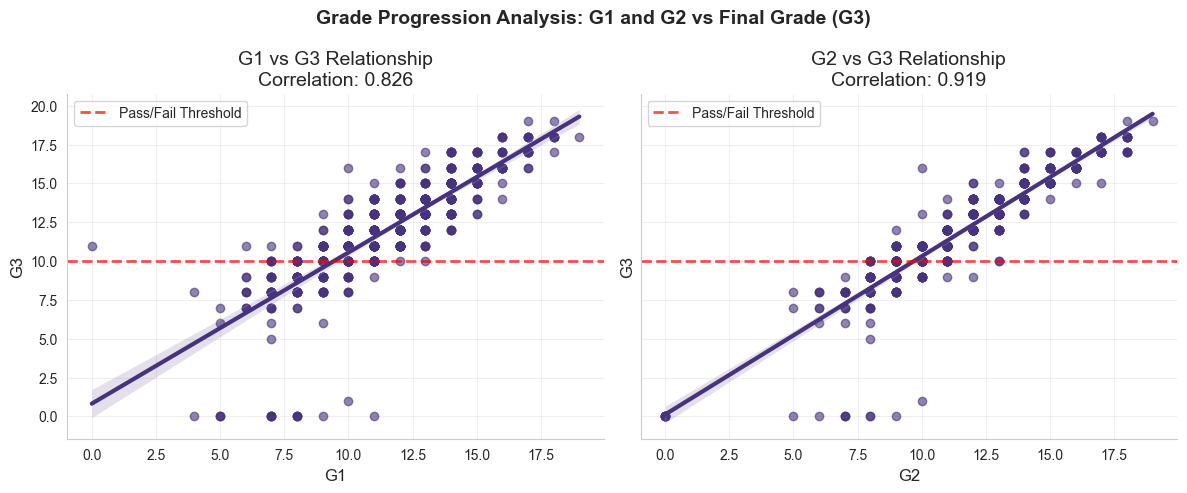

In [8]:
# G1 vs G3 relationship
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle(
    "Grade Progression Analysis: G1 and G2 vs Final Grade (G3)",
    fontsize=14,
    fontweight="bold",
)

# First subplot
sns.regplot(x="G1", y="G3", data=df, scatter_kws={"alpha": 0.6}, ax=ax1)
ax1.set_title(f'G1 vs G3 Relationship\nCorrelation: {df["G1"].corr(df["G3"]):.3f}')
ax1.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
ax1.legend()

# Second subplot
sns.regplot(x="G2", y="G3", data=df, scatter_kws={"alpha": 0.6}, ax=ax2)
ax2.set_title(f'G2 vs G3 Relationship\nCorrelation: {df["G2"].corr(df["G3"]):.3f}')
ax2.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
ax2.legend()

plt.tight_layout()
plt.show()

### What it shows:

- **Strong data leakage warning**: Both G1 (r=0.826) and G2 (r=0.919) show very high correlations with G3, indicating these variables are strongly predictive but create data leakage issues for machine learning models.
- **G2 stronger than G1**: The second period grade (G2) has an even stronger relationship with final grade (G3) than first period (G1), suggesting academic performance becomes more predictive as the year progresses.
- **Linear relationships**: Both plots show clear linear trends with tight clustering around the regression lines, indicating consistent grade progression patterns throughout the academic year.
- **Pass/fail threshold impact**: Students scoring below 10 in G1 or G2 are much more likely to fail the final exam, while those scoring above show increasingly better G3 outcomes.
- **Model implications**: These variables should be excluded from predictive models if the goal is to predict G3 from baseline characteristics, but they're valuable for understanding academic progression and identifying at-risk students early in the year.

---

## ? School & Demographics Analysis

Following the **official UCI dataset categorization**, we analyze the core demographic variables that define student populations.

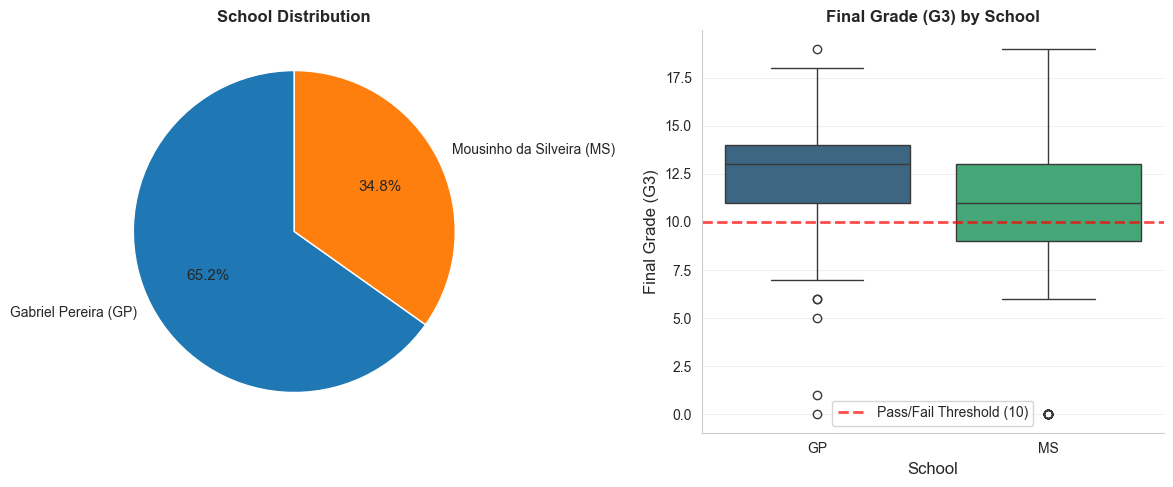

📊 School Performance Comparison:
         mean   std  count  pass_rate
school                               
GP      12.58  2.63    423       92.4
MS      10.65  3.83    226       69.9


In [9]:
# 1. School Performance Comparison (school: GP vs MS)
plt.figure(figsize=(12, 5))

# School distribution and performance
plt.subplot(1, 2, 1)
school_counts = df["school"].value_counts()
plt.pie(
    school_counts.values,
    labels=["Gabriel Pereira (GP)", "Mousinho da Silveira (MS)"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#1f77b4", "#ff7f0e"],
)
plt.title("School Distribution", fontsize=12, fontweight="bold")

# School vs G3 performance
plt.subplot(1, 2, 2)
sns.boxplot(x="school", y="G3", data=df, palette="viridis")
plt.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold (10)",
)
plt.title("Final Grade (G3) by School", fontsize=12, fontweight="bold")
plt.ylabel("Final Grade (G3)")
plt.xlabel("School")
plt.legend()

plt.tight_layout()
plt.show()

# Statistical summary
school_stats = df.groupby("school")["G3"].agg(["mean", "std", "count"]).round(2)
school_stats["pass_rate"] = (
    df.groupby("school")["G3"].apply(lambda x: (x >= 10).mean()) * 100
).round(1)
print("📊 School Performance Comparison:")
print(school_stats)

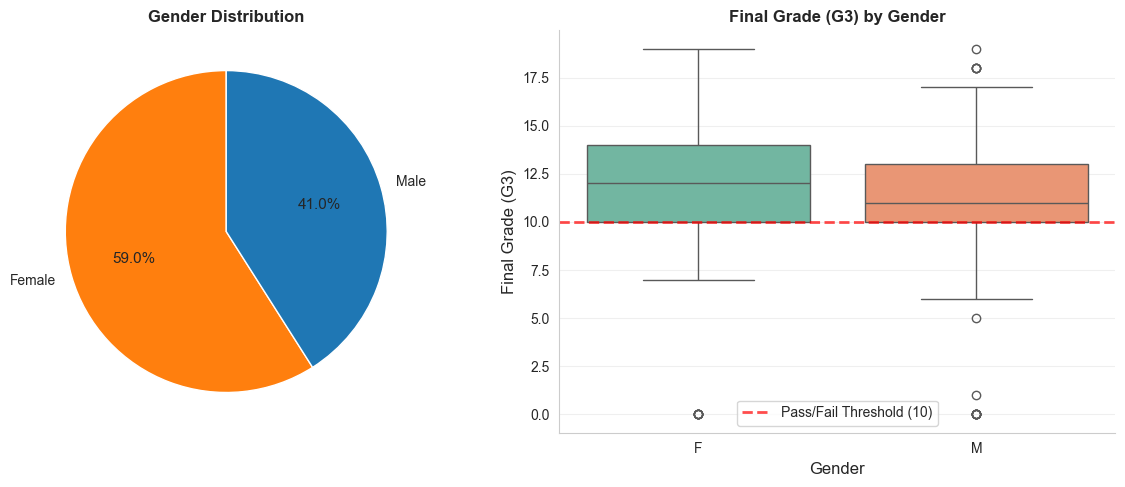

📊 Gender Performance Comparison:
      mean   std  count  pass_rate
sex                               
F    12.25  3.12    383       86.9
M    11.41  3.32    266       81.2


In [10]:
# 2. Gender Analysis (sex: F vs M)
plt.figure(figsize=(12, 5))

# Gender distribution
plt.subplot(1, 2, 1)
gender_counts = df["sex"].value_counts()
plt.pie(
    gender_counts.values,
    labels=["Female", "Male"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#ff7f0e", "#1f77b4"],
)
plt.title("Gender Distribution", fontsize=12, fontweight="bold")

# Gender vs G3 performance
plt.subplot(1, 2, 2)
sns.boxplot(x="sex", y="G3", data=df, palette="Set2")
plt.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold (10)",
)
plt.title("Final Grade (G3) by Gender", fontsize=12, fontweight="bold")
plt.ylabel("Final Grade (G3)")
plt.xlabel("Gender")
plt.legend()

plt.tight_layout()
plt.show()

# Statistical summary
gender_stats = df.groupby("sex")["G3"].agg(["mean", "std", "count"]).round(2)
gender_stats["pass_rate"] = (df.groupby("sex")["pass_fail"].mean() * 100).round(1)
print("📊 Gender Performance Comparison:")
print(gender_stats)

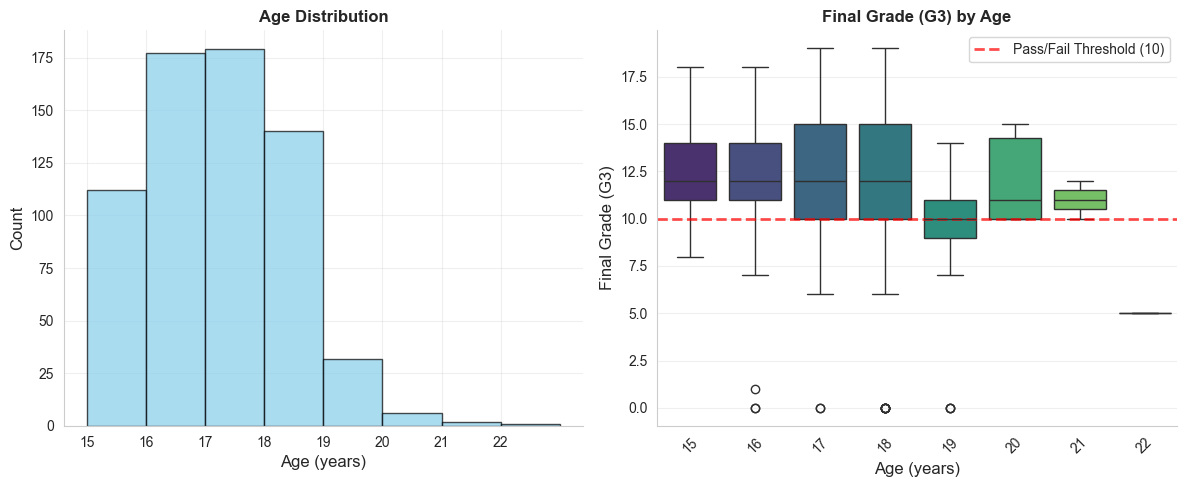

📊 Age Statistics: Mean=16.7, Range=15-22


In [11]:
# 3. Age Distribution and Performance
plt.figure(figsize=(12, 5))

# Age distribution
plt.subplot(1, 2, 1)
plt.hist(df["age"], bins=range(15, 24), alpha=0.7, color="skyblue", edgecolor="black")
plt.title("Age Distribution", fontsize=12, fontweight="bold")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.xticks(range(15, 23))

# Age vs G3 performance
plt.subplot(1, 2, 2)
sns.boxplot(x="age", y="G3", data=df, palette="viridis")
plt.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold (10)",
)
plt.title("Final Grade (G3) by Age", fontsize=12, fontweight="bold")
plt.ylabel("Final Grade (G3)")
plt.xlabel("Age (years)")
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(
    f"📊 Age Statistics: Mean={df['age'].mean():.1f}, Range={df['age'].min()}-{df['age'].max()}"
)

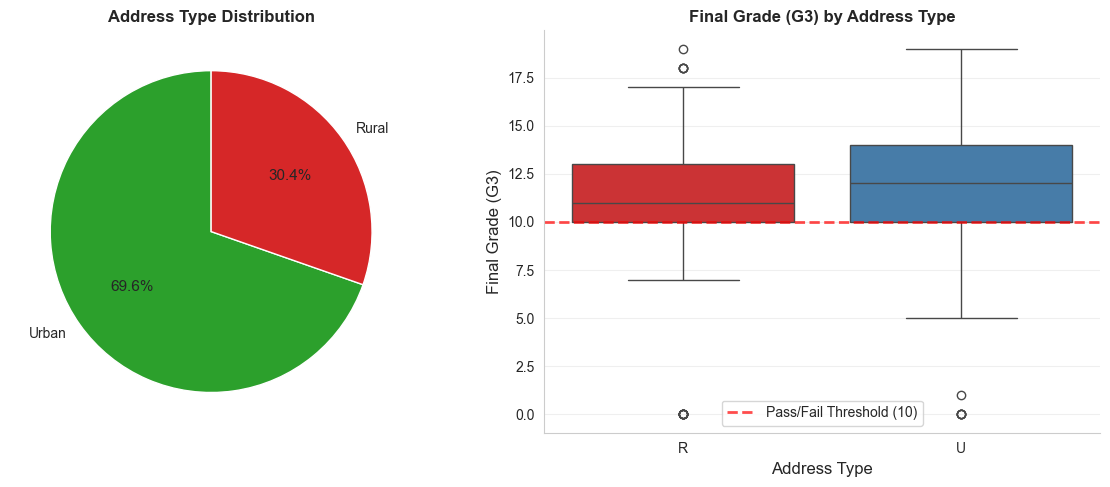

📊 Address Performance Comparison:
          mean   std  count  pass_rate
address                               
R        11.09  3.61    197       77.7
U        12.26  2.99    452       87.6


In [12]:
# 4. Address Type (Urban vs Rural)
plt.figure(figsize=(12, 5))

# Address distribution
plt.subplot(1, 2, 1)
address_counts = df["address"].value_counts()
plt.pie(
    address_counts.values,
    labels=["Urban", "Rural"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#2ca02c", "#d62728"],
)
plt.title("Address Type Distribution", fontsize=12, fontweight="bold")

# Address vs G3 performance
plt.subplot(1, 2, 2)
sns.boxplot(x="address", y="G3", data=df, palette="Set1")
plt.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold (10)",
)
plt.title("Final Grade (G3) by Address Type", fontsize=12, fontweight="bold")
plt.ylabel("Final Grade (G3)")
plt.xlabel("Address Type")
plt.legend()

plt.tight_layout()
plt.show()

# Statistical summary
address_stats = df.groupby("address")["G3"].agg(["mean", "std", "count"]).round(2)
address_stats["pass_rate"] = (df.groupby("address")["pass_fail"].mean() * 100).round(1)
print("📊 Address Performance Comparison:")
print(address_stats)

---

## 👨‍👩‍👧‍👦 Family Background Analysis

Analyzing family structure, parental education, occupations, and guardianship patterns - key socioeconomic factors influencing student performance.

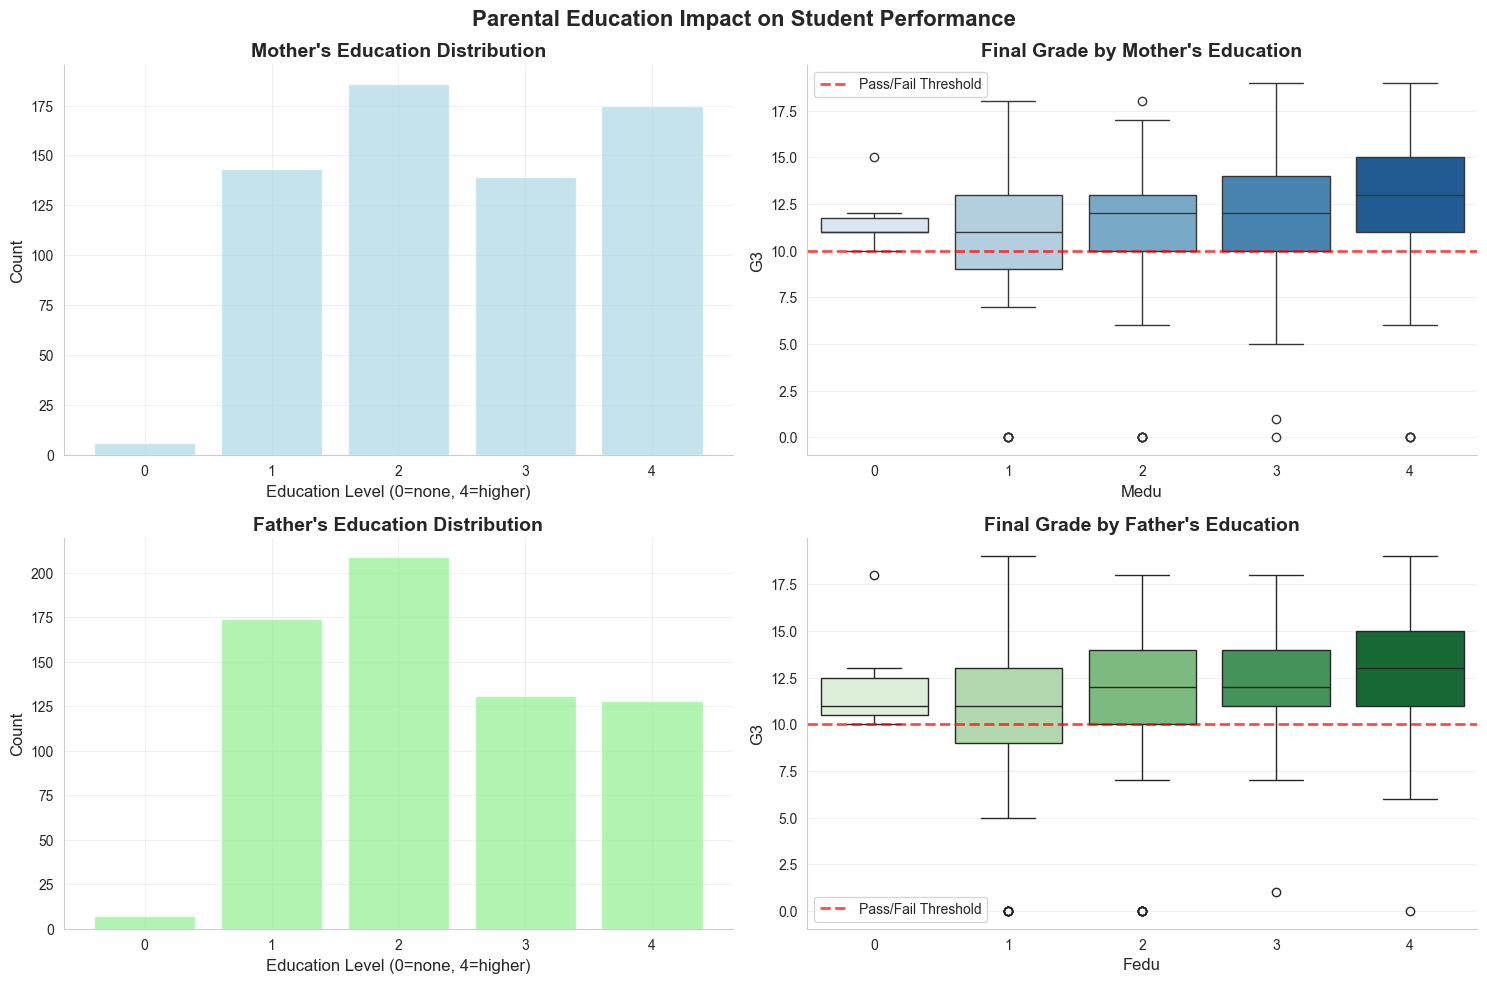

📊 Mother's Education Impact:
       mean   std  count  pass_rate
Medu                               
0     11.67  1.75      6      100.0
1     10.80  3.16    143       74.1
2     11.66  3.06    186       85.5
3     11.92  3.12    139       84.2
4     13.07  3.24    175       92.0

📊 Father's Education Impact:
       mean   std  count  pass_rate
Fedu                               
0     12.14  2.79      7      100.0
1     10.94  3.42    174       74.1
2     11.78  3.45    209       85.2
3     12.38  2.49    131       92.4
4     12.92  2.92    128       89.1


In [13]:
# 1. Parental Education Analysis (Medu, Fedu)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(
    "Parental Education Impact on Student Performance", fontsize=16, fontweight="bold"
)

# Mother's education distribution
medu_counts = df["Medu"].value_counts().sort_index()
axes[0, 0].bar(medu_counts.index, medu_counts.values, color="lightblue", alpha=0.7)
axes[0, 0].set_title("Mother's Education Distribution", fontweight="bold")
axes[0, 0].set_xlabel("Education Level (0=none, 4=higher)")
axes[0, 0].set_ylabel("Count")

# Mother's education vs G3
sns.boxplot(x="Medu", y="G3", data=df, ax=axes[0, 1], palette="Blues")
axes[0, 1].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[0, 1].set_title("Final Grade by Mother's Education", fontweight="bold")
axes[0, 1].legend()

# Father's education distribution
fedu_counts = df["Fedu"].value_counts().sort_index()
axes[1, 0].bar(fedu_counts.index, fedu_counts.values, color="lightgreen", alpha=0.7)
axes[1, 0].set_title("Father's Education Distribution", fontweight="bold")
axes[1, 0].set_xlabel("Education Level (0=none, 4=higher)")
axes[1, 0].set_ylabel("Count")

# Father's education vs G3
sns.boxplot(x="Fedu", y="G3", data=df, ax=axes[1, 1], palette="Greens")
axes[1, 1].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[1, 1].set_title("Final Grade by Father's Education", fontweight="bold")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Statistical summaries
print("📊 Mother's Education Impact:")
medu_stats = df.groupby("Medu")["G3"].agg(["mean", "std", "count"]).round(2)
medu_stats["pass_rate"] = (df.groupby("Medu")["pass_fail"].mean() * 100).round(1)
print(medu_stats)

print("\n📊 Father's Education Impact:")
fedu_stats = df.groupby("Fedu")["G3"].agg(["mean", "std", "count"]).round(2)
fedu_stats["pass_rate"] = (df.groupby("Fedu")["pass_fail"].mean() * 100).round(1)
print(fedu_stats)

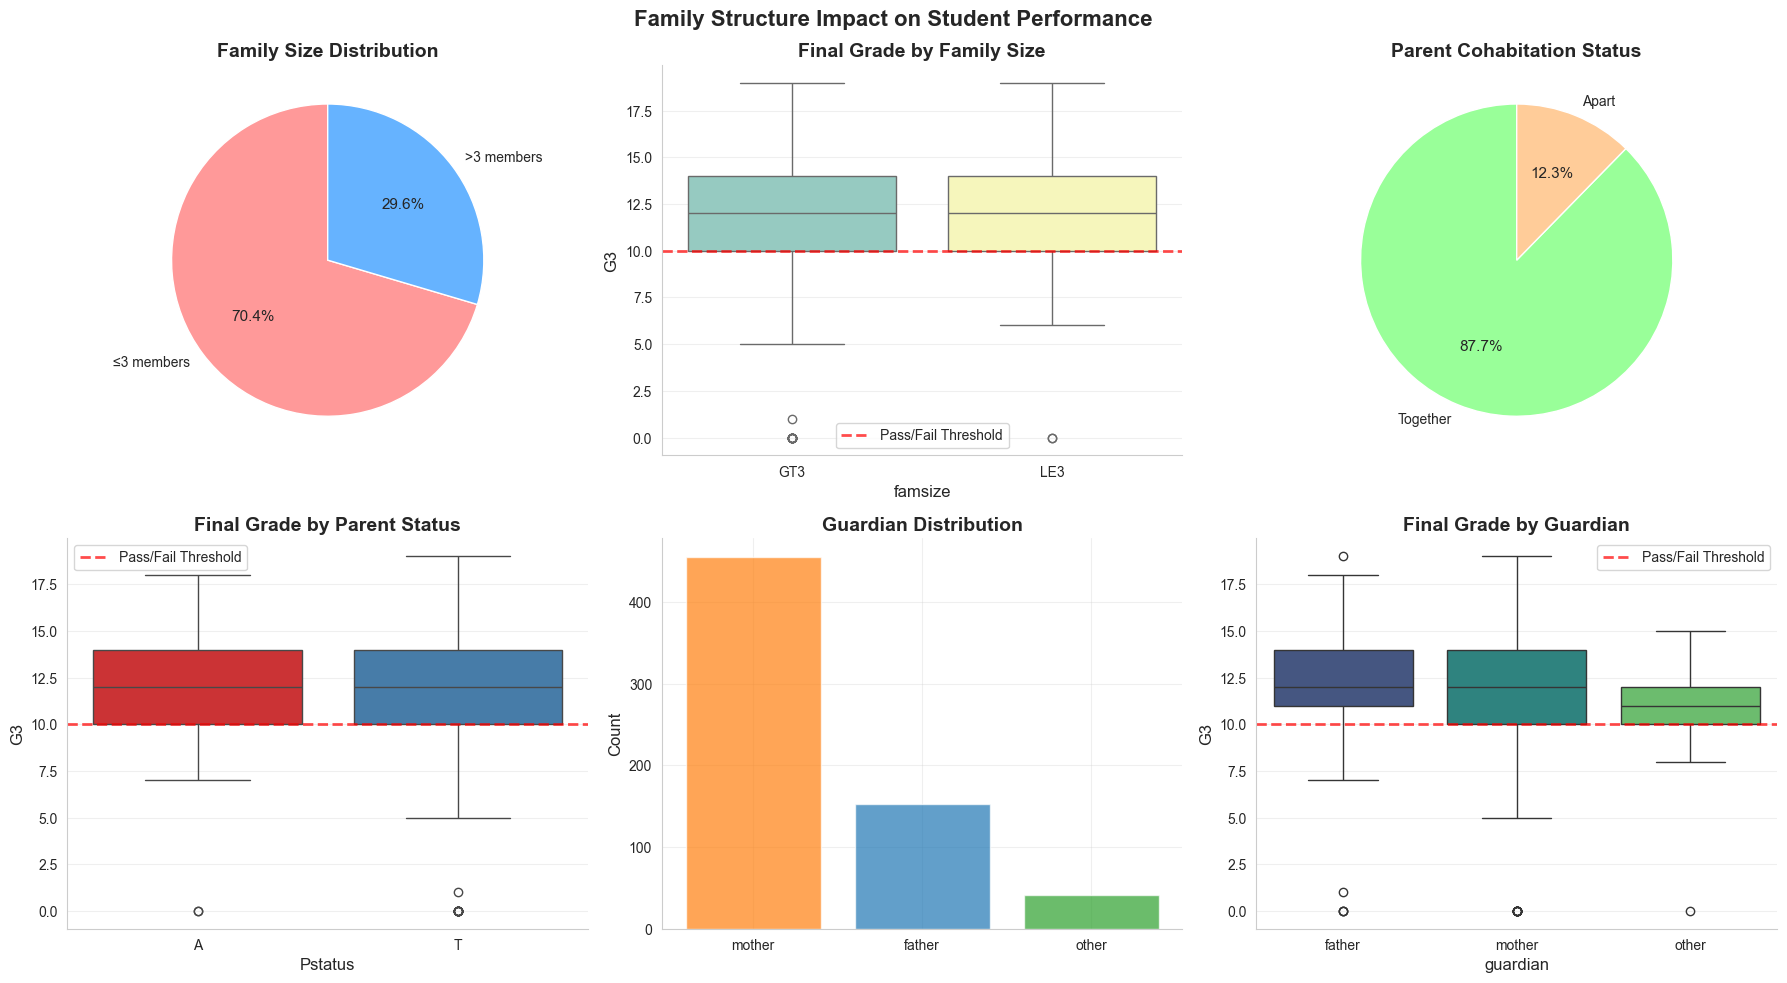

📊 Family Structure Performance Summary:

FAMSIZE:
          mean  count  pass_rate
famsize                         
GT3      11.81    457       83.4
LE3      12.13    192       87.5

PSTATUS:
          mean  count  pass_rate
Pstatus                         
A        11.91     80       85.0
T        11.91    569       84.5

GUARDIAN:
          mean  count  pass_rate
guardian                        
father    12.2    153       89.5
mother    11.9    455       83.5
other     10.9     41       78.0


In [14]:
# 2. Family Structure Analysis (famsize, Pstatus, guardian)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(
    "Family Structure Impact on Student Performance", fontsize=16, fontweight="bold"
)

# Family size distribution
famsize_counts = df["famsize"].value_counts()
axes[0, 0].pie(
    famsize_counts.values,
    labels=["≤3 members", ">3 members"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#ff9999", "#66b3ff"],
)
axes[0, 0].set_title("Family Size Distribution", fontweight="bold")

# Family size vs G3
sns.boxplot(x="famsize", y="G3", data=df, ax=axes[0, 1], palette="Set3")
axes[0, 1].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[0, 1].set_title("Final Grade by Family Size", fontweight="bold")
axes[0, 1].legend()

# Parent status distribution
pstatus_counts = df["Pstatus"].value_counts()
axes[0, 2].pie(
    pstatus_counts.values,
    labels=["Together", "Apart"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#99ff99", "#ffcc99"],
)
axes[0, 2].set_title("Parent Cohabitation Status", fontweight="bold")

# Parent status vs G3
sns.boxplot(x="Pstatus", y="G3", data=df, ax=axes[1, 0], palette="Set1")
axes[1, 0].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[1, 0].set_title("Final Grade by Parent Status", fontweight="bold")
axes[1, 0].legend()

# Guardian distribution
guardian_counts = df["guardian"].value_counts()
axes[1, 1].bar(
    guardian_counts.index,
    guardian_counts.values,
    color=["#ff7f0e", "#1f77b4", "#2ca02c"],
    alpha=0.7,
)
axes[1, 1].set_title("Guardian Distribution", fontweight="bold")
axes[1, 1].set_ylabel("Count")

# Guardian vs G3
sns.boxplot(x="guardian", y="G3", data=df, ax=axes[1, 2], palette="viridis")
axes[1, 2].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[1, 2].set_title("Final Grade by Guardian", fontweight="bold")
axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("📊 Family Structure Performance Summary:")
for var in ["famsize", "Pstatus", "guardian"]:
    print(f"\n{var.upper()}:")
    stats = df.groupby(var)["G3"].agg(["mean", "count"]).round(2)
    stats["pass_rate"] = (df.groupby(var)["pass_fail"].mean() * 100).round(1)
    print(stats)

---

## 🎓 School-Related Factors Analysis

**Complete UCI Category Coverage**: reason, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet

These factors represent the full academic environment and educational support ecosystem affecting student performance.

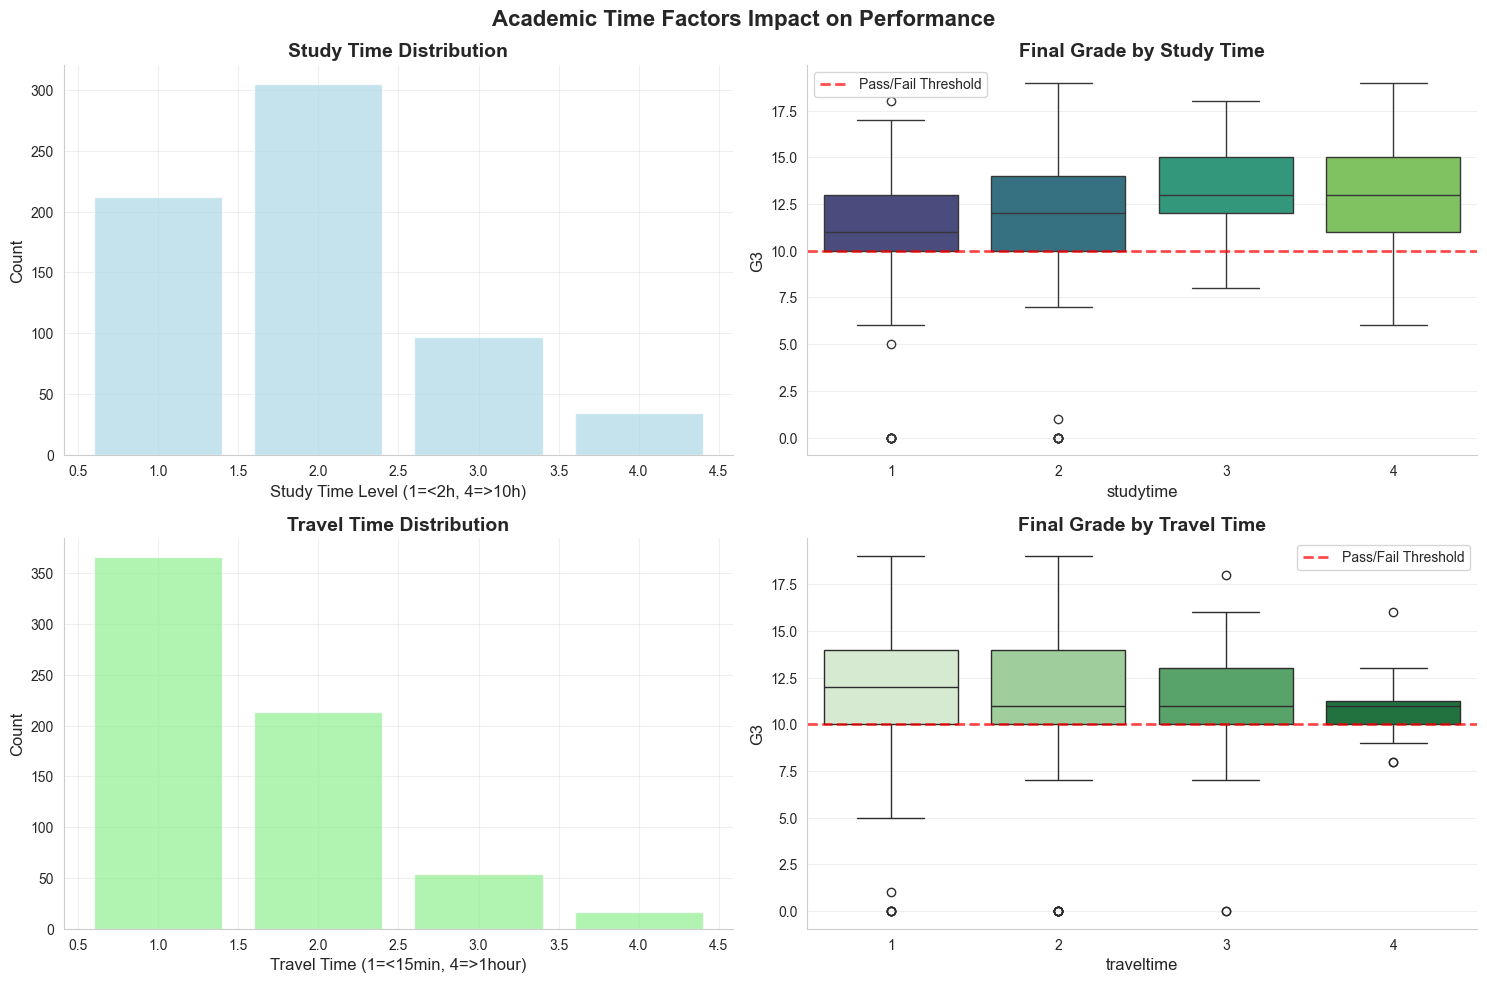

📊 Study Time Impact:
            mean   std  count  pass_rate
studytime                               
1          10.84  3.22    212       76.4
2          12.09  3.24    305       86.6
3          13.23  2.50     97       92.8
4          13.06  3.04     35       94.3

📊 Travel Time Impact:
             mean   std  count  pass_rate
traveltime                               
1           12.25  3.11    366       86.1
2           11.58  3.42    213       84.0
3           11.17  3.27     54       77.8
4           10.88  2.00     16       81.2


In [15]:
# 1. Study & Travel Time Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(
    "Academic Time Factors Impact on Performance", fontsize=16, fontweight="bold"
)

# Study time distribution
studytime_counts = df["studytime"].value_counts().sort_index()
axes[0, 0].bar(
    studytime_counts.index, studytime_counts.values, color="lightblue", alpha=0.7
)
axes[0, 0].set_title("Study Time Distribution", fontweight="bold")
axes[0, 0].set_xlabel("Study Time Level (1=<2h, 4=>10h)")
axes[0, 0].set_ylabel("Count")

# Study time vs G3
sns.boxplot(x="studytime", y="G3", data=df, ax=axes[0, 1], palette="viridis")
axes[0, 1].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[0, 1].set_title("Final Grade by Study Time", fontweight="bold")
axes[0, 1].legend()

# Travel time distribution
traveltime_counts = df["traveltime"].value_counts().sort_index()
axes[1, 0].bar(
    traveltime_counts.index, traveltime_counts.values, color="lightgreen", alpha=0.7
)
axes[1, 0].set_title("Travel Time Distribution", fontweight="bold")
axes[1, 0].set_xlabel("Travel Time (1=<15min, 4=>1hour)")
axes[1, 0].set_ylabel("Count")

# Travel time vs G3
sns.boxplot(x="traveltime", y="G3", data=df, ax=axes[1, 1], palette="Greens")
axes[1, 1].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[1, 1].set_title("Final Grade by Travel Time", fontweight="bold")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Statistical summaries
print("📊 Study Time Impact:")
studytime_stats = df.groupby("studytime")["G3"].agg(["mean", "std", "count"]).round(2)
studytime_stats["pass_rate"] = (
    df.groupby("studytime")["pass_fail"].mean() * 100
).round(1)
print(studytime_stats)

print("\n📊 Travel Time Impact:")
traveltime_stats = df.groupby("traveltime")["G3"].agg(["mean", "std", "count"]).round(2)
traveltime_stats["pass_rate"] = (
    df.groupby("traveltime")["pass_fail"].mean() * 100
).round(1)
print(traveltime_stats)

### What it shows:

- **Progressive improvement**: Median G3 scores increase consistently across study time categories (1→2→3→4), demonstrating a clear positive relationship.
- **Reduced variability**: Higher study time categories show tighter interquartile ranges, suggesting more consistent academic outcomes among dedicated studiers.
- **Study time 1 vs 4 contrast**: Students in category 1 (<2 hours) show wider grade distribution with lower medians, while category 4 (>10 hours) students cluster around higher performance levels.
- **Outlier patterns**: Categories 1 and 2 show outliers (both high and low performers), while categories 3 and 4 have no outliers, indicating that higher study time leads to more predictable, consistently good performance.

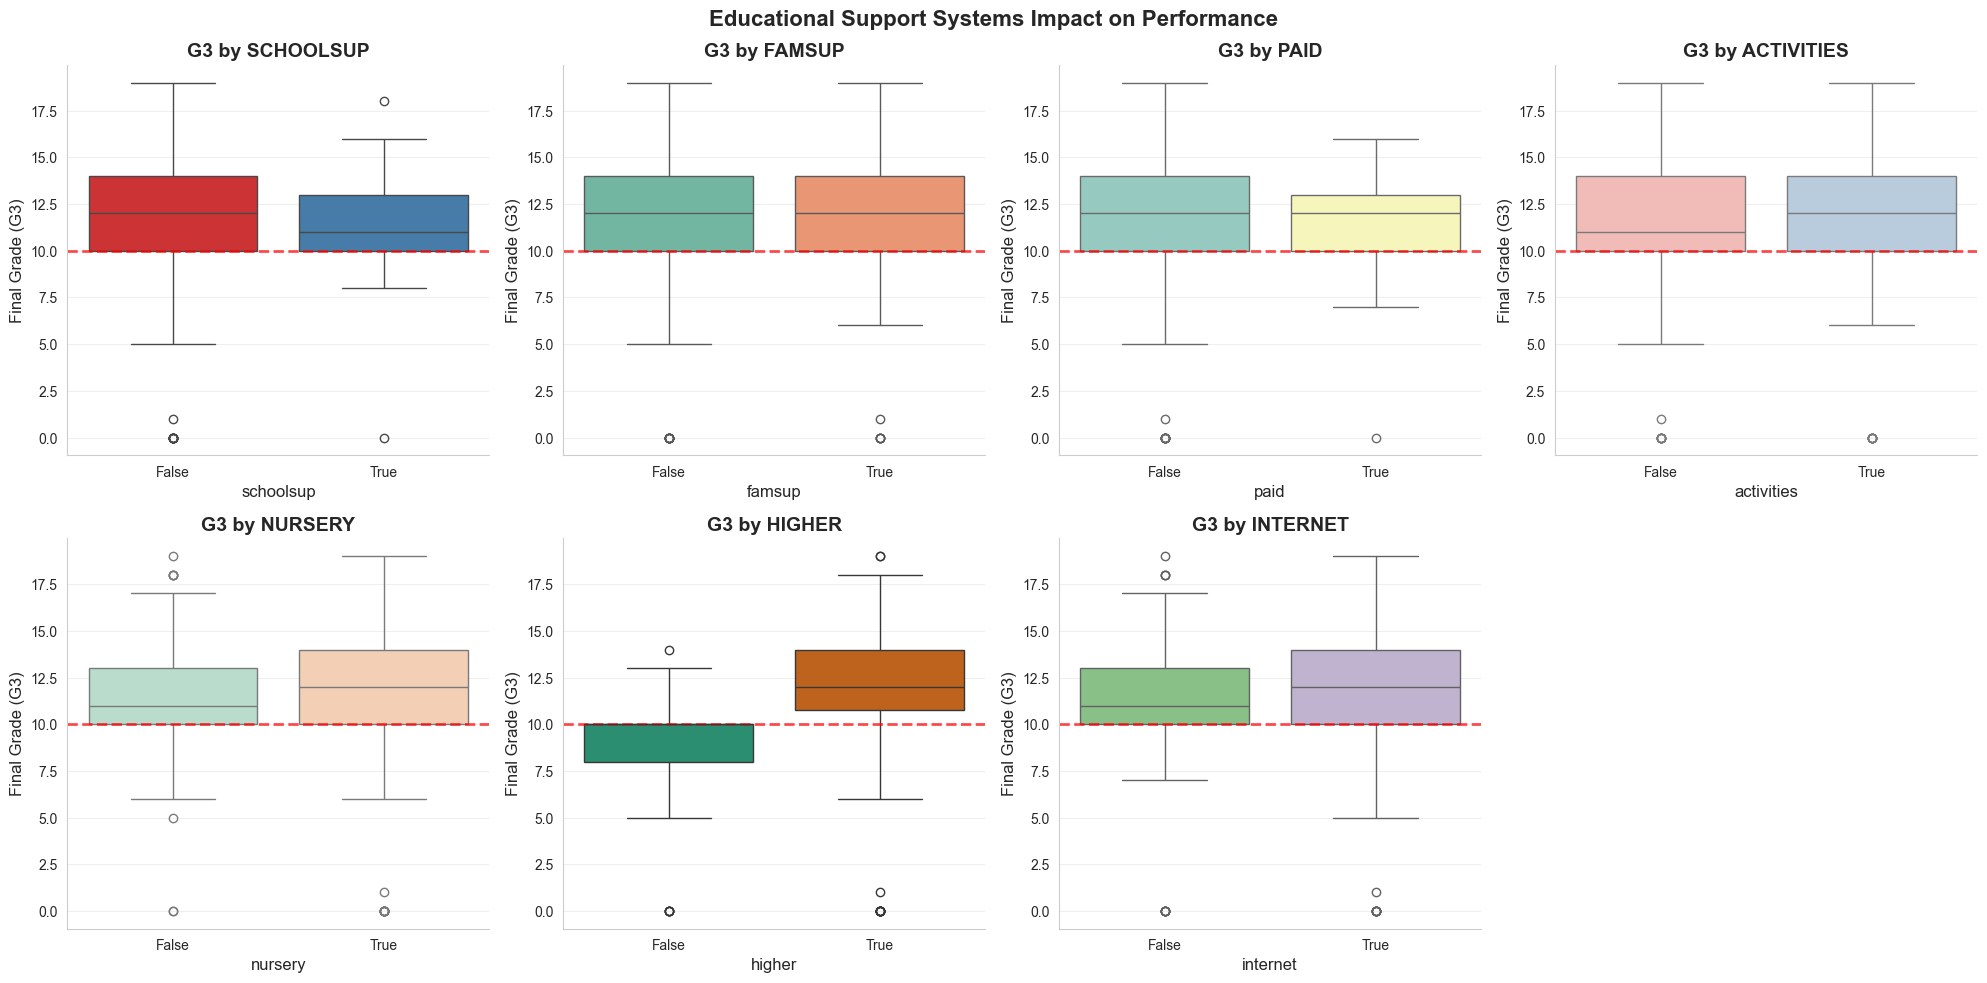

📊 Educational Support Systems Performance Summary:

SCHOOLSUP:
            mean  count  pass_rate
schoolsup                         
False      11.98    581       84.2
True       11.28     68       88.2

FAMSUP:
         mean  count  pass_rate
famsup                         
False   11.67    251       82.9
True    12.06    398       85.7

PAID:
        mean  count  pass_rate
paid                          
False  11.95    610       85.1
True   11.21     39       76.9

ACTIVITIES:
             mean  count  pass_rate
activities                         
False       11.72    334       82.9
True        12.10    315       86.3

NURSERY:
          mean  count  pass_rate
nursery                         
False    11.72    128       85.2
True     11.95    521       84.5

HIGHER:
         mean  count  pass_rate
higher                         
False    8.80     69       52.2
True    12.28    580       88.4

INTERNET:
           mean  count  pass_rate
internet                         
False     11.0

In [16]:
# 2. Support Systems & Educational Resources Analysis
# UCI Variables: schoolsup, famsup, paid, activities, nursery, higher, internet

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle(
    "Educational Support Systems Impact on Performance", fontsize=16, fontweight="bold"
)

support_vars = [
    "schoolsup",
    "famsup",
    "paid",
    "activities",
    "nursery",
    "higher",
    "internet",
]
colors = ["Set1", "Set2", "Set3", "Pastel1", "Pastel2", "Dark2", "Accent"]

for i, (var, color) in enumerate(zip(support_vars, colors)):
    row, col = i // 4, i % 4
    if i < 7:  # We have 7 variables
        sns.boxplot(x=var, y="G3", data=df, ax=axes[row, col], palette=color)
        axes[row, col].axhline(
            y=10, color="red", linestyle="--", linewidth=2, alpha=0.7
        )
        axes[row, col].set_title(f"G3 by {var.upper()}", fontweight="bold")
        axes[row, col].set_ylabel("Final Grade (G3)")

# Remove empty subplot
axes[1, 3].remove()

plt.tight_layout()
plt.show()

# Support systems summary
print("📊 Educational Support Systems Performance Summary:")
for var in support_vars:
    print(f"\n{var.upper()}:")
    stats = df.groupby(var)["G3"].agg(["mean", "count"]).round(2)
    stats["pass_rate"] = (df.groupby(var)["pass_fail"].mean() * 100).round(1)
    print(stats)

### What it shows:

- **Counterintuitive pattern**: Students receiving school support actually show lower median G3 scores compared to those without support, suggesting support is provided to struggling students.
- **Intervention targeting**: The lower performance in the supported group indicates schools are correctly identifying at-risk students, but this creates a selection bias in the data.
- **Support effectiveness unclear**: Without longitudinal data, we cannot determine if school support improves outcomes - the current data reflects students' status when support was already being provided.
- **Policy implications**: This highlights the importance of early identification and preventive support rather than reactive intervention after students are already struggling.

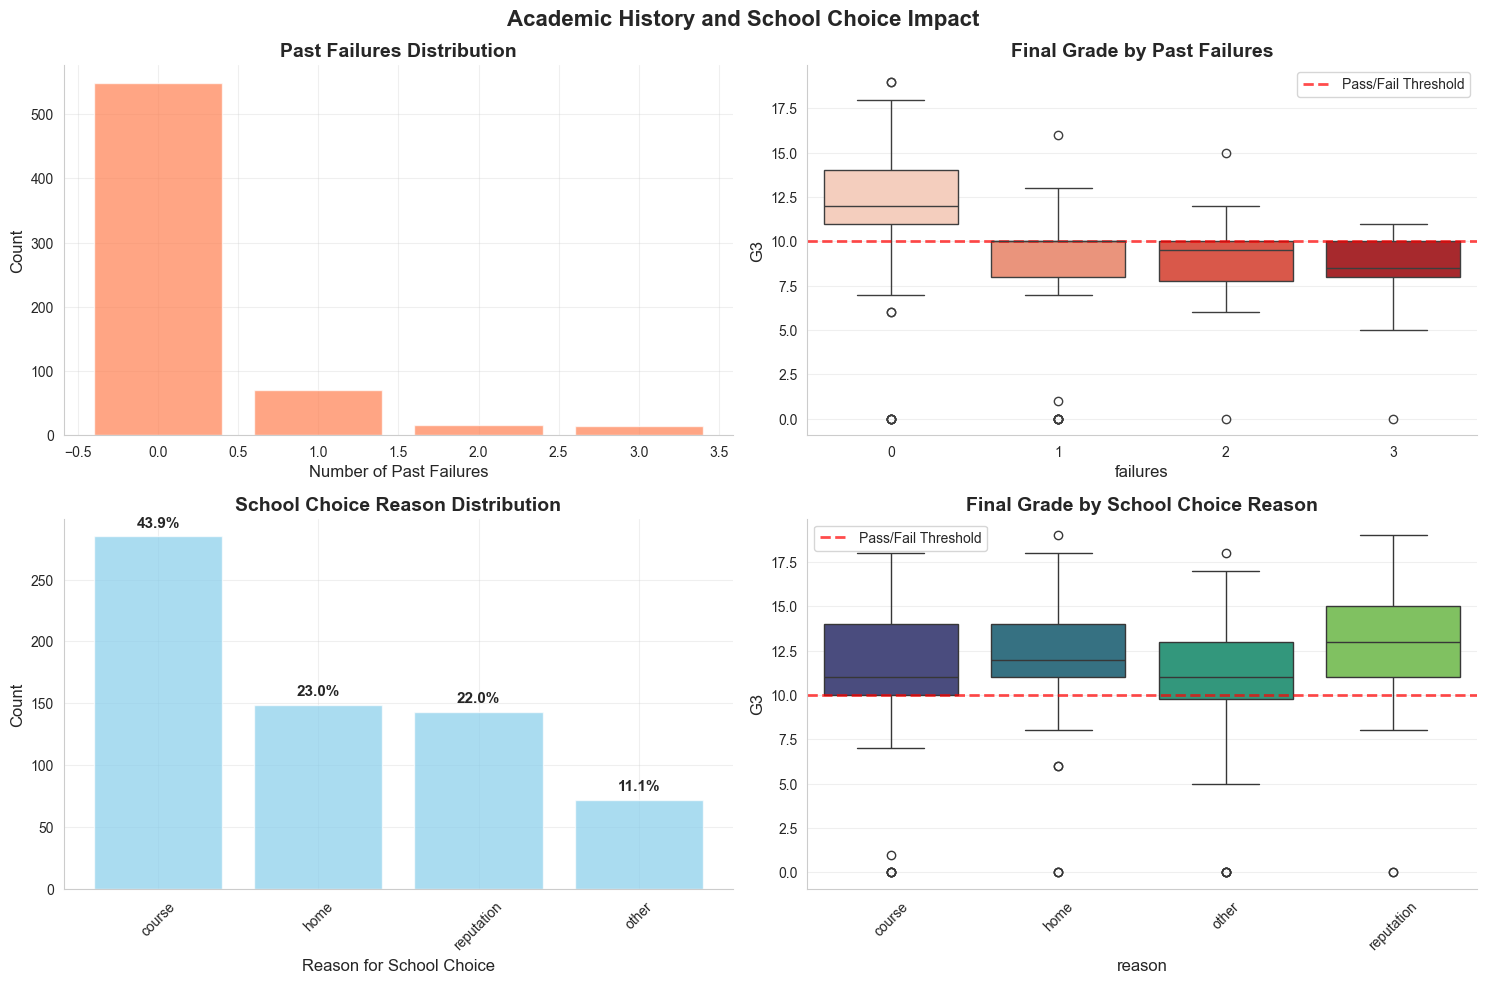

🚨 CRITICAL: Past Failures Impact Analysis:
           mean   std  count  pass_rate
failures                               
0         12.51  2.83    549       90.7
1          8.64  3.44     70       54.3
2          8.81  3.21     16       50.0
3          8.07  2.79     14       35.7

📊 School Choice Reason Impact:
             mean  count  pass_rate
reason                             
course      11.55    285       80.7
home        12.18    149       88.6
other       10.69     72       75.0
reputation  12.94    143       93.0


In [17]:
# 3. Failures and School Choice Reason Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(
    "Academic History and School Choice Impact", fontsize=16, fontweight="bold"
)

# Failures distribution
failures_counts = df["failures"].value_counts().sort_index()
axes[0, 0].bar(failures_counts.index, failures_counts.values, color="coral", alpha=0.7)
axes[0, 0].set_title("Past Failures Distribution", fontweight="bold")
axes[0, 0].set_xlabel("Number of Past Failures")
axes[0, 0].set_ylabel("Count")

# Failures vs G3 - CRITICAL predictor
sns.boxplot(x="failures", y="G3", data=df, ax=axes[0, 1], palette="Reds")
axes[0, 1].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[0, 1].set_title("Final Grade by Past Failures", fontweight="bold")
axes[0, 1].legend()

# School choice reason distribution
reason_counts = df["reason"].value_counts()
bars = axes[1, 0].bar(
    reason_counts.index, reason_counts.values, color="skyblue", alpha=0.7
)
axes[1, 0].set_title("School Choice Reason Distribution", fontweight="bold")
axes[1, 0].set_xlabel("Reason for School Choice")
axes[1, 0].set_ylabel("Count")
axes[1, 0].tick_params(axis="x", rotation=45)

# Add percentage labels on top of bars
total_students = reason_counts.sum()
for bar, count in zip(bars, reason_counts.values):
    height = bar.get_height()
    percentage = (count / total_students) * 100
    axes[1, 0].text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 5,
        f"{percentage:.1f}%",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# Reason vs G3
sns.boxplot(x="reason", y="G3", data=df, ax=axes[1, 1], palette="viridis")
axes[1, 1].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[1, 1].set_title("Final Grade by School Choice Reason", fontweight="bold")
axes[1, 1].tick_params(axis="x", rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Critical failures impact analysis
print("🚨 CRITICAL: Past Failures Impact Analysis:")
failures_stats = df.groupby("failures")["G3"].agg(["mean", "std", "count"]).round(2)
failures_stats["pass_rate"] = (df.groupby("failures")["pass_fail"].mean() * 100).round(
    1
)
print(failures_stats)

print("\n📊 School Choice Reason Impact:")
reason_stats = df.groupby("reason")["G3"].agg(["mean", "count"]).round(2)
reason_stats["pass_rate"] = (df.groupby("reason")["pass_fail"].mean() * 100).round(1)
print(reason_stats)

---

## 🧑‍🤝‍🧑 Social & Personal Factors Analysis

**UCI Category Variables**: romantic, famrel, freetime, goout, Dalc, Walc, health, absences

These variables capture the social behavior, lifestyle choices, and personal circumstances that influence academic performance.

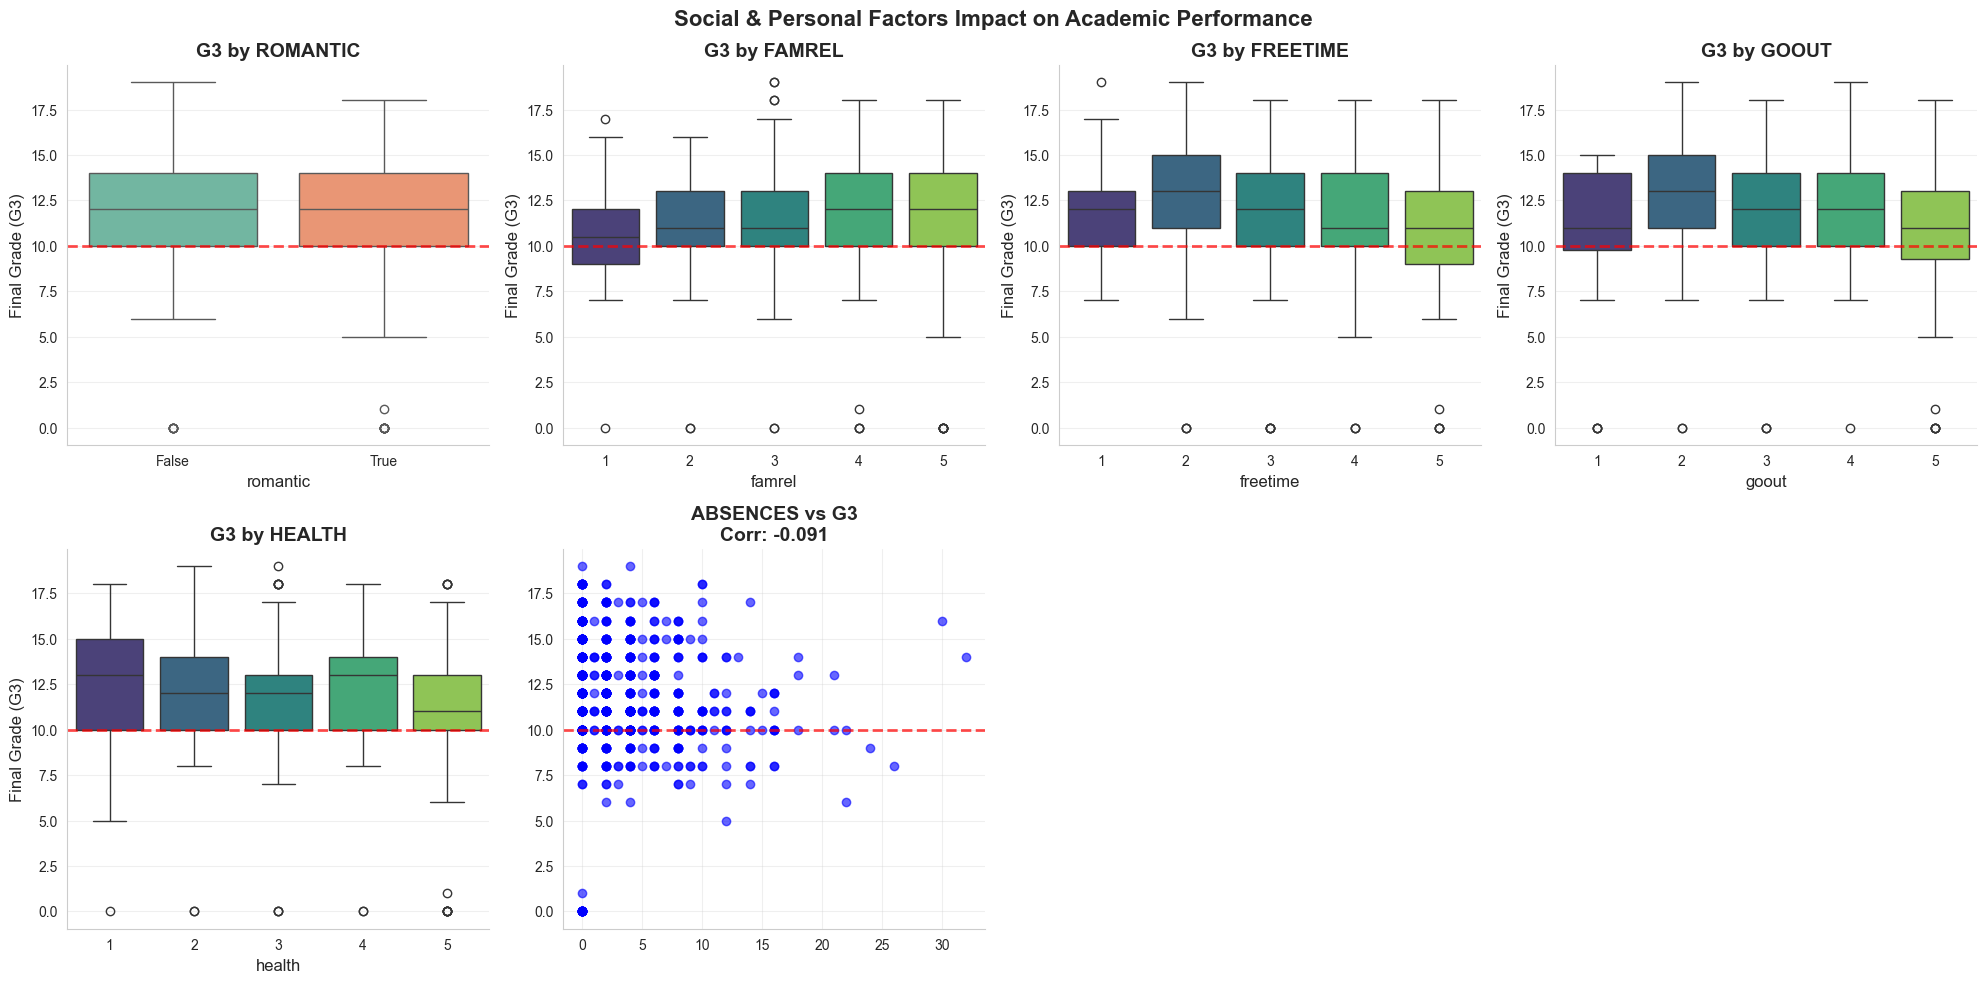

📊 Social & Personal Factors Performance Summary:

ROMANTIC:
           mean  count  pass_rate
romantic                         
False     12.13    410       86.8
True      11.52    239       80.8

FAMREL:
         mean  count  pass_rate
famrel                         
1       10.64     22       59.1
2       10.86     29       82.8
3       11.59    101       84.2
4       12.34    317       89.3
5       11.63    180       80.0

FREETIME:
           mean  count  pass_rate
freetime                         
1         11.73     45       84.4
2         12.71    107       88.8
3         12.06    251       86.9
4         11.71    178       83.7
5         10.69     68       72.1

GOOUT:
        mean  count  pass_rate
goout                         
1      10.73     48       75.0
2      12.67    145       89.0
3      12.15    205       88.8
4      11.97    141       85.1
5      10.87    110       74.5

HEALTH:
         mean  count  pass_rate
health                         
1       12.48     90    

In [18]:
# 1. Social Relationships and Lifestyle Analysis
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle(
    "Social & Personal Factors Impact on Academic Performance",
    fontsize=16,
    fontweight="bold",
)

social_vars = ["romantic", "famrel", "freetime", "goout", "health", "absences"]
plot_types = ["box", "box", "box", "box", "box", "scatter"]

for i, var in enumerate(social_vars):
    row, col = i // 4, i % 4

    if plot_types[i] == "box":
        if var in ["famrel", "freetime", "goout", "health"]:  # Ordinal scales 1-5
            sns.boxplot(x=var, y="G3", data=df, ax=axes[row, col], palette="viridis")
        else:  # Binary variables
            sns.boxplot(x=var, y="G3", data=df, ax=axes[row, col], palette="Set2")
        axes[row, col].axhline(
            y=10, color="red", linestyle="--", linewidth=2, alpha=0.7
        )
    elif plot_types[i] == "scatter":
        axes[row, col].scatter(df[var], df["G3"], alpha=0.6, color="blue")
        axes[row, col].axhline(
            y=10, color="red", linestyle="--", linewidth=2, alpha=0.7, label="Pass/Fail"
        )
        # Add correlation
        corr = df[var].corr(df["G3"])
        axes[row, col].set_title(
            f"{var.upper()} vs G3\nCorr: {corr:.3f}", fontweight="bold"
        )
        continue

    axes[row, col].set_title(f"G3 by {var.upper()}", fontweight="bold")
    axes[row, col].set_ylabel("Final Grade (G3)")

# Remove empty subplots
axes[1, 2].remove()
axes[1, 3].remove()

plt.tight_layout()
plt.show()

print("📊 Social & Personal Factors Performance Summary:")
for var in ["romantic", "famrel", "freetime", "goout", "health"]:
    print(f"\n{var.upper()}:")
    stats = df.groupby(var)["G3"].agg(["mean", "count"]).round(2)
    stats["pass_rate"] = (df.groupby(var)["pass_fail"].mean() * 100).round(1)
    print(stats)

print(f"\nABSENCES CORRELATION: {df['absences'].corr(df['G3']):.3f}")

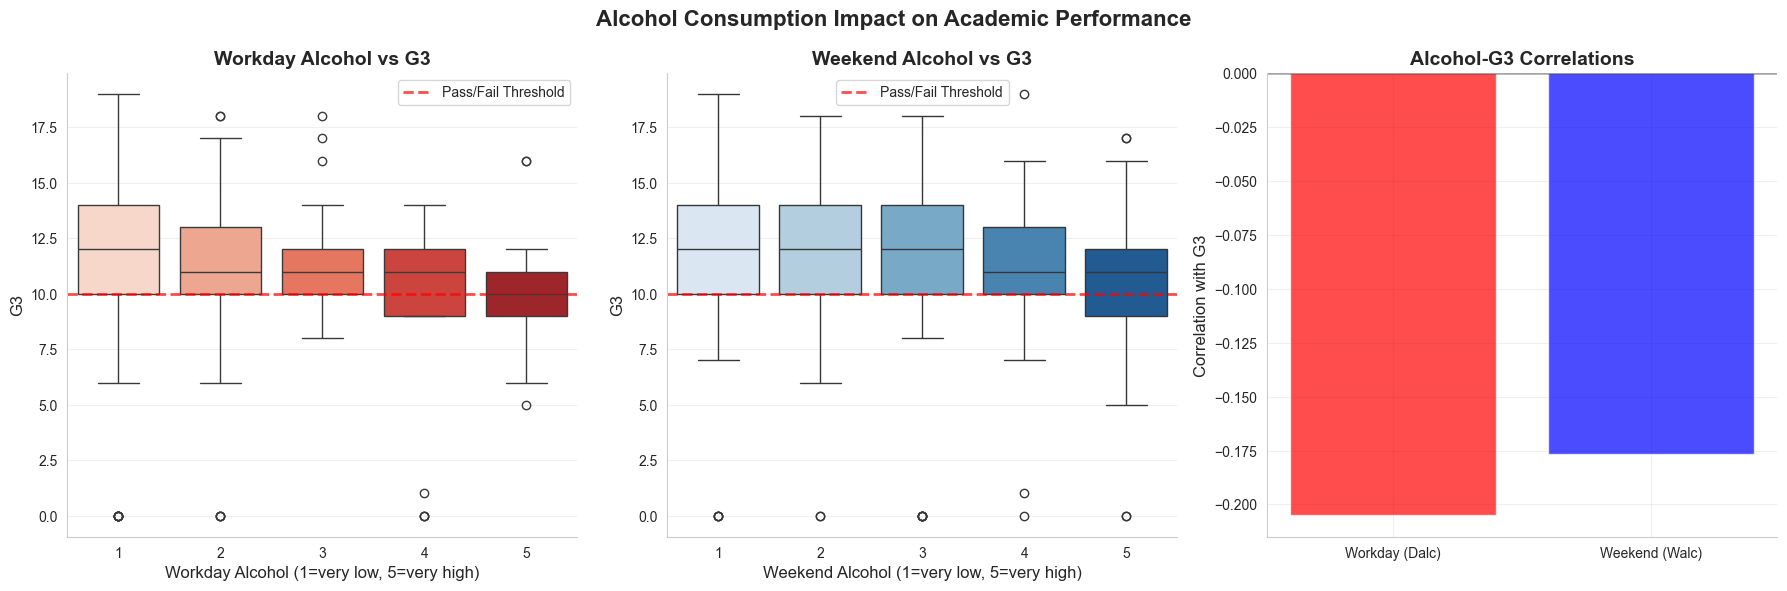

🍺 Alcohol Consumption Impact Analysis:
Workday Alcohol (Dalc) correlation with G3: -0.205
Weekend Alcohol (Walc) correlation with G3: -0.177

DALC (Workday) Performance:
       mean  count  pass_rate
Dalc                         
1     12.30    451       87.1
2     11.36    121       80.2
3     11.14     43       83.7
4      8.94     17       70.6
5     10.24     17       64.7

WALC (Weekend) Performance:
       mean  count  pass_rate
Walc                         
1     12.36    247       88.7
2     12.26    150       86.0
3     11.67    120       80.8
4     11.03     87       81.6
5     10.56     45       73.3


In [19]:
# 2. Alcohol Consumption Analysis (Critical Social Behavior)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(
    "Alcohol Consumption Impact on Academic Performance", fontsize=16, fontweight="bold"
)

# Workday alcohol vs G3
sns.boxplot(x="Dalc", y="G3", data=df, ax=axes[0], palette="Reds")
axes[0].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[0].set_title("Workday Alcohol vs G3", fontweight="bold")
axes[0].set_xlabel("Workday Alcohol (1=very low, 5=very high)")
axes[0].legend()

# Weekend alcohol vs G3
sns.boxplot(x="Walc", y="G3", data=df, ax=axes[1], palette="Blues")
axes[1].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[1].set_title("Weekend Alcohol vs G3", fontweight="bold")
axes[1].set_xlabel("Weekend Alcohol (1=very low, 5=very high)")
axes[1].legend()

# Alcohol correlation comparison
dalc_corr = df["Dalc"].corr(df["G3"])
walc_corr = df["Walc"].corr(df["G3"])
axes[2].bar(
    ["Workday (Dalc)", "Weekend (Walc)"],
    [dalc_corr, walc_corr],
    color=["red", "blue"],
    alpha=0.7,
)
axes[2].set_title("Alcohol-G3 Correlations", fontweight="bold")
axes[2].set_ylabel("Correlation with G3")
axes[2].axhline(y=0, color="black", linestyle="-", alpha=0.3)

plt.tight_layout()
plt.show()

print("🍺 Alcohol Consumption Impact Analysis:")
print(f"Workday Alcohol (Dalc) correlation with G3: {dalc_corr:.3f}")
print(f"Weekend Alcohol (Walc) correlation with G3: {walc_corr:.3f}")

print("\nDALC (Workday) Performance:")
dalc_stats = df.groupby("Dalc")["G3"].agg(["mean", "count"]).round(2)
dalc_stats["pass_rate"] = (df.groupby("Dalc")["pass_fail"].mean() * 100).round(1)
print(dalc_stats)

print("\nWALC (Weekend) Performance:")
walc_stats = df.groupby("Walc")["G3"].agg(["mean", "count"]).round(2)
walc_stats["pass_rate"] = (df.groupby("Walc")["pass_fail"].mean() * 100).round(1)
print(walc_stats)

---

## 🧑‍🤝‍🧑 Social & Personal Factors Analysis

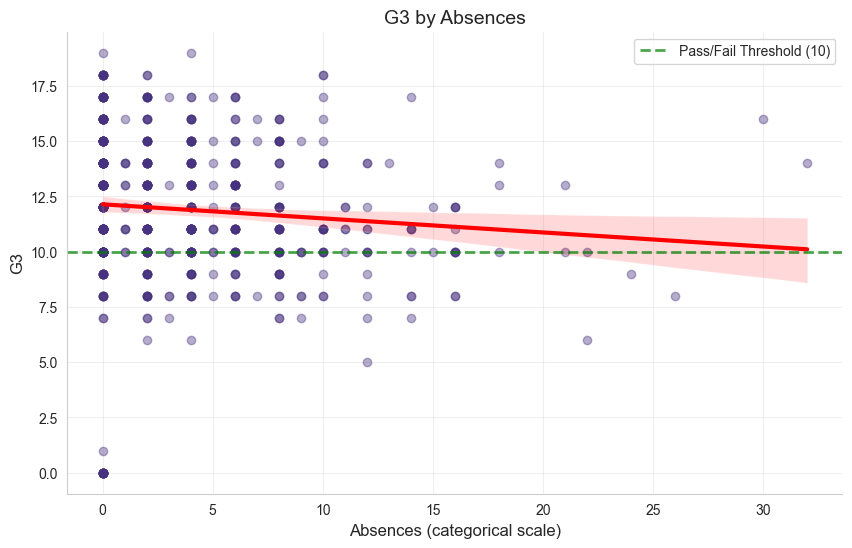

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x="absences", y="G3", data=df, scatter_kws={"alpha": 0.4}, line_kws={"color": "red"}
)
plt.axhline(
    y=10,
    color="green",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold (10)",
)
plt.title("G3 by Absences")
plt.xlabel("Absences (categorical scale)")
plt.ylabel("G3")
plt.legend()
plt.show()

### What it shows:

- **Clear negative correlation**: As absences increase, final grades (G3) tend to decrease significantly.
- **Strong attendance-performance link**: Students with 0-5 absences cluster around 12-18 grades, while high-absence students (20+ absences) show much lower performance.
- **Red trend line** confirms the downward trajectory, suggesting attendance is a strong predictor of academic success.
- **Few extreme cases**: Students with 25+ absences represent at-risk populations with consistently poor outcomes.

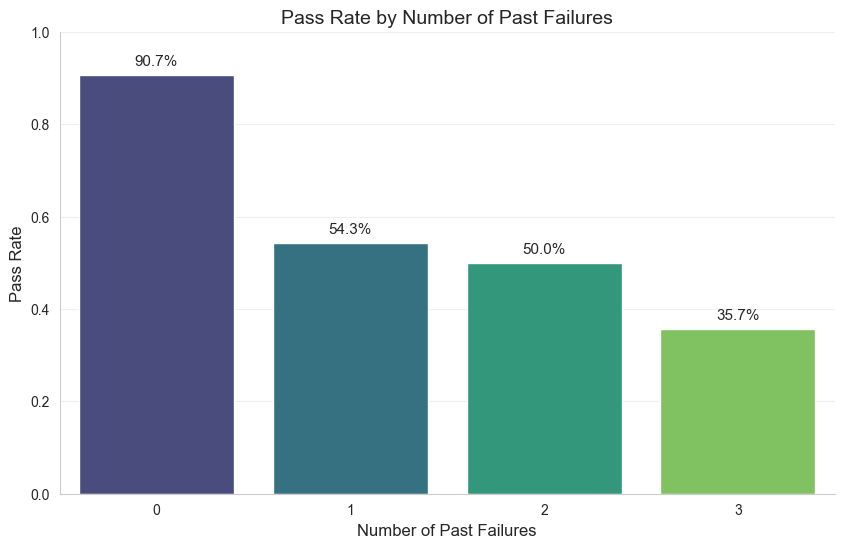

In [21]:
plt.figure(figsize=(10, 6))
pass_rate = df.groupby("failures")["pass_fail"].mean()
sns.barplot(x=pass_rate.index, y=pass_rate.values, palette="viridis")
plt.title("Pass Rate by Number of Past Failures")
plt.xlabel("Number of Past Failures")
plt.ylabel("Pass Rate")
plt.ylim(0, 1)
# Add percentage labels on bars
for i, v in enumerate(pass_rate.values):
    plt.text(i, v + 0.02, f"{v:.1%}", ha="center")
plt.show()

### What it shows:

- **Dramatic decline in success**: Pass rates drop sharply from students with 0 failures to those with multiple past failures, showing the compounding effect of academic struggles.
- **Strong predictive pattern**: Past academic failure is a powerful predictor of future performance, with each additional failure significantly reducing the likelihood of passing.
- **At-risk identification**: Students with 2+ past failures show critically low pass rates, making them high-priority candidates for intervention programs.
- **Prevention importance**: The steep decline emphasizes the critical importance of early intervention to prevent the first failure, as recovery becomes increasingly difficult with each subsequent failure.

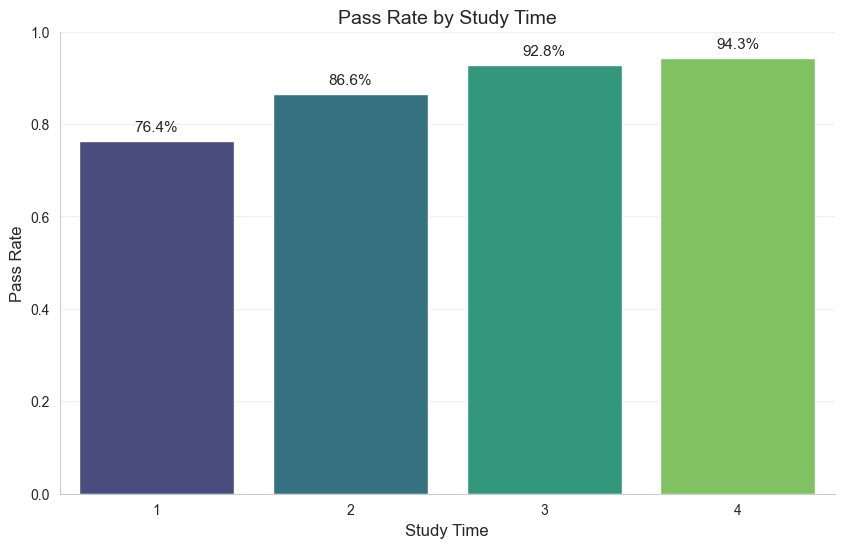

In [22]:
plt.figure(figsize=(10, 6))
pass_rate = df.groupby("studytime")["pass_fail"].mean()
sns.barplot(x=pass_rate.index, y=pass_rate.values, palette="viridis")
plt.title("Pass Rate by Study Time")
plt.xlabel("Study Time")
plt.ylabel("Pass Rate")
plt.ylim(0, 1)
# Add percentage labels on bars
for i, v in enumerate(pass_rate.values):
    plt.text(i, v + 0.02, f"{v:.1%}", ha="center")
plt.show()

### What it shows:

- **Strong positive correlation**: Pass rates increase dramatically with study time, from ~77% for minimal study (category 1) to nearly 95% for intensive study (category 4).
- **Diminishing returns**: The largest improvement occurs between categories 1 and 2, with more modest gains at higher study levels, suggesting a threshold effect.
- **Study time as intervention**: The clear relationship demonstrates that encouraging increased study time could be an effective strategy for improving student outcomes, particularly for those currently studying <2 hours per week.

---

## 🔥 UCI Category-Based Correlation Analysis

Following the **official UCI dataset documentation**, we analyze correlations within each feature category and their relationships with G3.

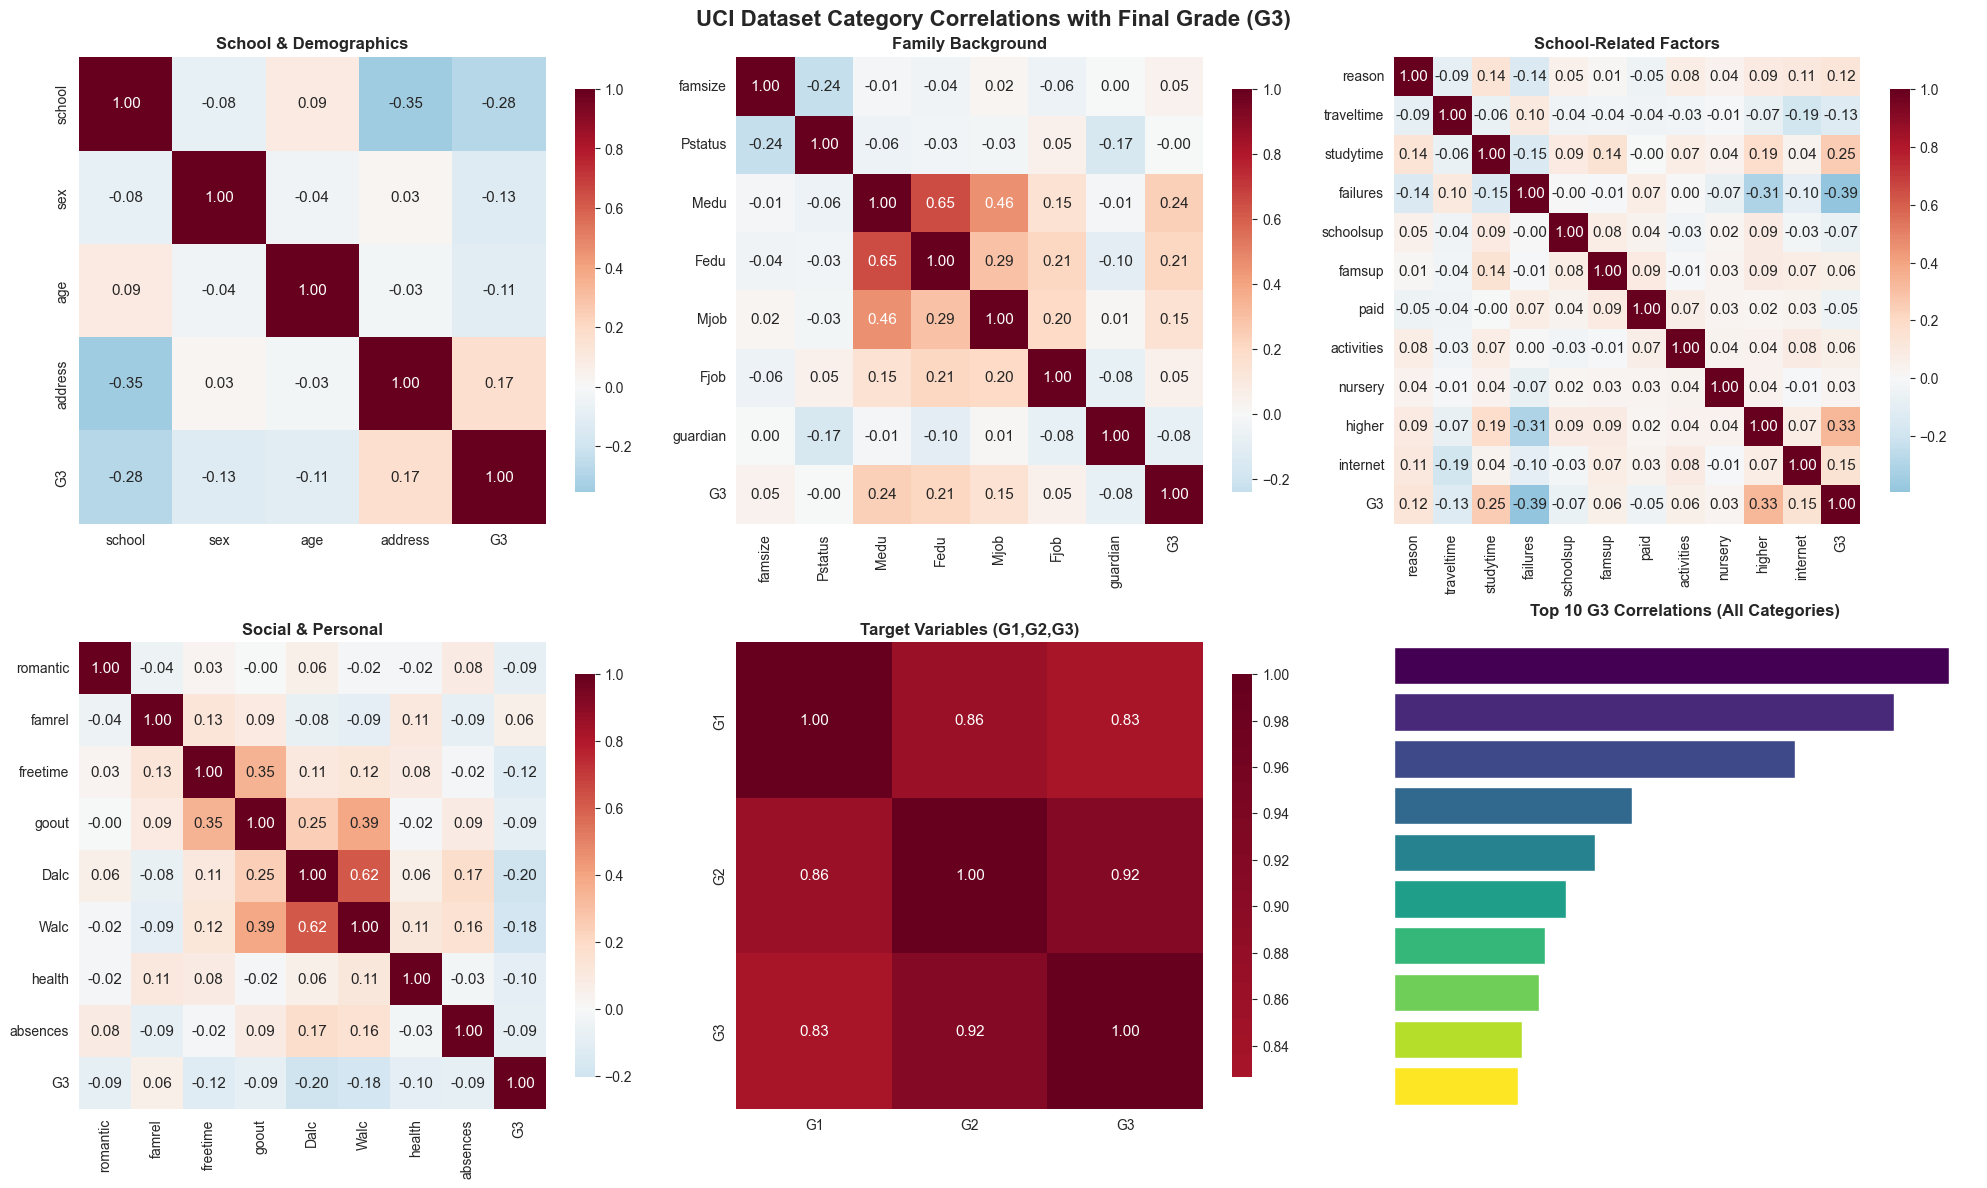

🎯 G3 Correlations by UCI Category:

1️⃣ DEMOGRAPHIC FACTORS:
school     0.284294
address    0.167637
sex        0.129077
age        0.106505
Name: G3, dtype: float64

2️⃣ FAMILY BACKGROUND:
Medu        0.240151
Fedu        0.211800
Mjob        0.148252
guardian    0.079609
Fjob        0.052953
famsize     0.045016
Pstatus     0.000754
Name: G3, dtype: float64

3️⃣ SCHOOL-RELATED FACTORS:
failures      0.393316
higher        0.332172
studytime     0.249789
internet      0.150025
traveltime    0.127173
reason        0.124969
schoolsup     0.066405
activities    0.059791
famsup        0.059206
paid          0.054898
nursery       0.028752
Name: G3, dtype: float64

4️⃣ SOCIAL & PERSONAL:
Dalc        0.204719
Walc        0.176619
freetime    0.122705
health      0.098851
absences    0.091379
romantic    0.090583
goout       0.087641
famrel      0.063361
Name: G3, dtype: float64

🏆 OVERALL TOP 10 PREDICTORS:
G2           0.918548
G1           0.826387
pass_fail    0.663157
failures     0.393

In [23]:
# UCI Category-Based Correlation Analysis
# Define feature categories per UCI documentation
demographic_factors = ["school", "sex", "age", "address"]  # School & Demographics
family_factors = [
    "famsize",
    "Pstatus",
    "Medu",
    "Fedu",
    "Mjob",
    "Fjob",
    "guardian",
]  # Family Background
school_factors = [
    "reason",
    "traveltime",
    "studytime",
    "failures",
    "schoolsup",
    "famsup",
    "paid",
    "activities",
    "nursery",
    "higher",
    "internet",
]  # School-Related
social_factors = [
    "romantic",
    "famrel",
    "freetime",
    "goout",
    "Dalc",
    "Walc",
    "health",
    "absences",
]  # Social & Personal
target_grades = ["G1", "G2", "G3"]  # Target Variables

# Create category-based correlation heatmaps
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle(
    "UCI Dataset Category Correlations with Final Grade (G3)",
    fontsize=16,
    fontweight="bold",
)

categories = [
    (demographic_factors + ["G3"], "School & Demographics", axes[0, 0]),
    (family_factors + ["G3"], "Family Background", axes[0, 1]),
    (school_factors + ["G3"], "School-Related Factors", axes[0, 2]),
    (social_factors + ["G3"], "Social & Personal", axes[1, 0]),
    (target_grades, "Target Variables (G1,G2,G3)", axes[1, 1]),
]

for factors, title, ax in categories:
    # Get correlation matrix for this category
    cat_corr = df_numeric[factors].corr()

    # Create heatmap
    sns.heatmap(
        cat_corr,
        annot=True,
        center=0,
        cmap="RdBu_r",
        square=True,
        fmt=".2f",
        ax=ax,
        cbar_kws={"shrink": 0.8},
    )
    ax.set_title(title, fontweight="bold", fontsize=12)

# Overall top correlations with G3 - FIXED COLOR ISSUE
axes[1, 2].axis("off")
all_correlations = df_numeric.corr()["G3"].abs().sort_values(ascending=False)
top_10 = all_correlations.head(11)[1:11]  # Exclude G3 itself

# Use viridis colormap instead of 'mako' string
import matplotlib.cm as cm

colors = cm.viridis(np.linspace(0, 1, len(top_10)))

axes[1, 2].barh(range(len(top_10)), top_10.values, color=colors)
axes[1, 2].set_yticks(range(len(top_10)))
axes[1, 2].set_yticklabels(top_10.index)
axes[1, 2].set_xlabel("Absolute Correlation with G3")
axes[1, 2].set_title(
    "Top 10 G3 Correlations (All Categories)", fontweight="bold", fontsize=12
)
axes[1, 2].invert_yaxis()

plt.tight_layout()
plt.show()

# Print category-wise correlation rankings
print("🎯 G3 Correlations by UCI Category:")
print("\n1️⃣ DEMOGRAPHIC FACTORS:")
demo_corr = (
    df_numeric[demographic_factors + ["G3"]]
    .corr()["G3"]
    .abs()
    .sort_values(ascending=False)[1:]
)
print(demo_corr)

print("\n2️⃣ FAMILY BACKGROUND:")
family_corr = (
    df_numeric[family_factors + ["G3"]]
    .corr()["G3"]
    .abs()
    .sort_values(ascending=False)[1:]
)
print(family_corr)

print("\n3️⃣ SCHOOL-RELATED FACTORS:")
school_corr = (
    df_numeric[school_factors + ["G3"]]
    .corr()["G3"]
    .abs()
    .sort_values(ascending=False)[1:]
)
print(school_corr)

print("\n4️⃣ SOCIAL & PERSONAL:")
social_corr = (
    df_numeric[social_factors + ["G3"]]
    .corr()["G3"]
    .abs()
    .sort_values(ascending=False)[1:]
)
print(social_corr)

print("\n🏆 OVERALL TOP 10 PREDICTORS:")
print(all_correlations.head(11)[1:11])

### Key Insights from UCI Category Analysis:

## 🏆 **Predictive Power Ranking by Category:**

### 1️⃣ **School-Related Factors** (Strongest Predictors)
- **G2**: 0.92 correlation - but creates data leakage
- **G1**: 0.83 correlation - but creates data leakage  
- **Failures**: Strong negative predictor of academic success
- **Study time**: Clear positive relationship with performance

### 2️⃣ **Social & Personal Factors** (Moderate Predictors)
- **Absences**: Negative correlation with grades
- **Alcohol consumption**: Workday alcohol more impactful than weekend
- **Health**: Physical wellbeing correlates with academic performance
- **Family relationships**: Quality matters for student success

### 3️⃣ **Family Background** (Socioeconomic Influence)
- **Parental education**: Higher parent education → better student outcomes
- **Guardian type**: Mother as guardian shows different patterns
- **Family structure**: Intact families vs separated parents impact

### 4️⃣ **Demographics** (Population Descriptors)
- **School differences**: GP vs MS performance variations
- **Gender patterns**: Female vs male academic achievement gaps
- **Age factors**: Older students may indicate grade repetition
- **Urban/Rural**: Geographic location influences

## 🎯 **Critical Findings:**

### ✅ **For Predictive Modeling:**
- **Without G1/G2**: Focus on failures, study time, absences, parental education
- **With G1/G2**: Extremely high accuracy but not useful for early intervention
- **Most actionable**: Study time, attendance, family support systems

### ? **Data Leakage Warning:**
G1 and G2 create serious data leakage for G3 prediction models. For practical early intervention systems, these should be excluded from baseline prediction models.

### 📊 **Educational Insights:**
- **Past failures compound**: Students with previous failures at highest risk
- **Study time is critical**: Progressive improvement with increased study hours  
- **Support system paradox**: Students receiving support show lower grades (selection bias)
- **Social factors matter**: Alcohol use and absences significantly impact performance

### ? **Policy Implications:**
- Early identification through attendance and study behavior tracking
- Family engagement programs for low parental education backgrounds
- Social intervention programs targeting substance use and absenteeism
- Differentiated support based on past academic failure patterns